## Task 6 - Prediction using Decision Trees

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#reading the data
df=pd.read_csv(r'Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(('Id'), axis = 1, inplace = True)

In [4]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

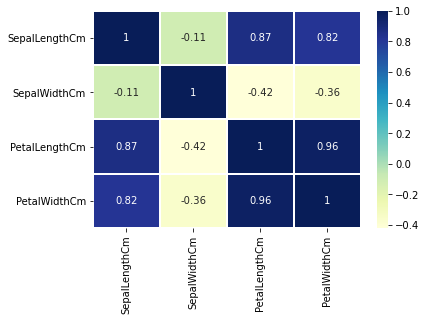

In [5]:
sns.heatmap(df.corr(), cmap ="YlGnBu", linecolor='white', linewidths=1, annot = True )

In [6]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Three types of species present:
1. Iris-setosa  
2. Iris-versicolor
3. Iris-virginica 

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

### Data visualization with the help of scatter plot

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

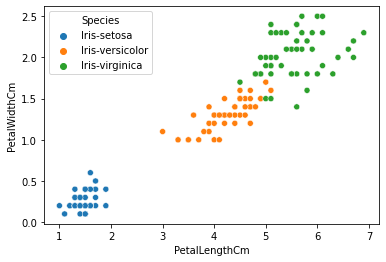

In [8]:
sns.scatterplot(data = df, x = "PetalLengthCm", y="PetalWidthCm", hue = 'Species')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

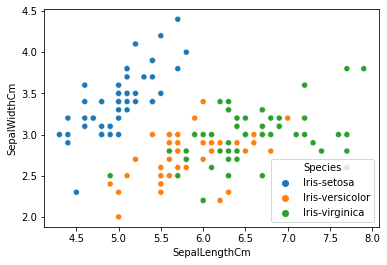

In [9]:
sns.scatterplot(data = df, x = "SepalLengthCm", y="SepalWidthCm", hue = "Species")

<I>Here we can differentiate between different species present in our data 


<I>To plot multiple pairwise bivariate distributions in a dataset. The pairplot() function shows the relationship for (n,2) combination of variable in a Dataframe as a matrix of plots and the diagonal plots are univariate plots

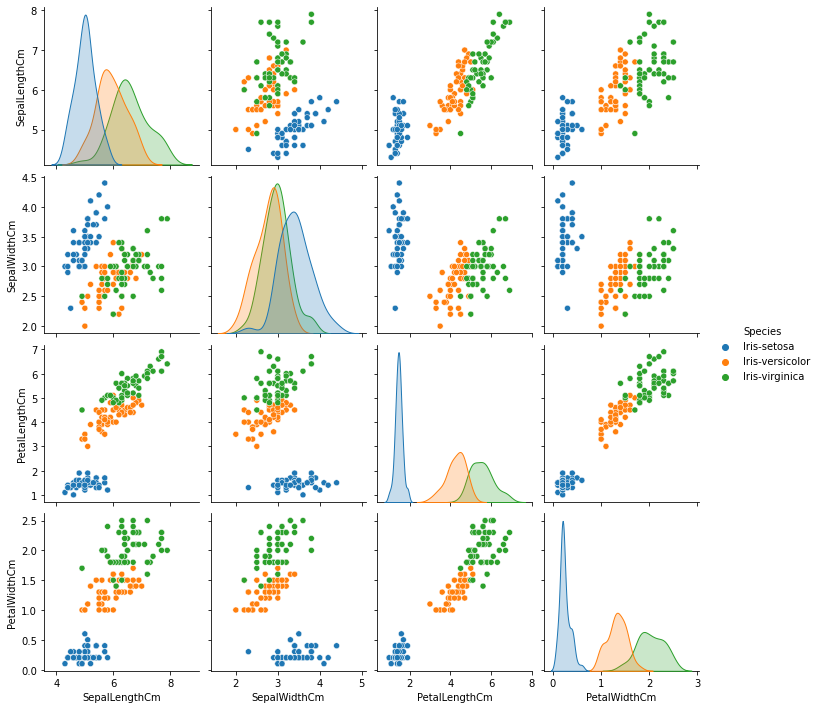

In [10]:
sns.pairplot(df, kind = "scatter" , hue = 'Species')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

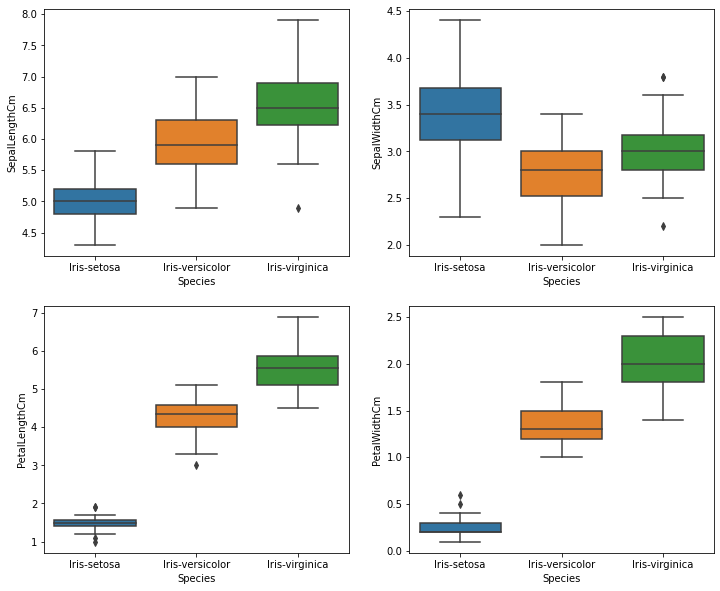

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

<I>Let's split the data in the input and the output data

In [12]:
X= df.drop('Species', axis = 1)
y = df.Species

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.77, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(115, 4)
(35, 4)
(115,)
(35,)


In [15]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [16]:
y_pred = DTree.predict(X_test)

In [17]:
DTree.score(X_test, y_test)

1.0

In [18]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [19]:
pred_df.head()

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


### Let us visualize the Decision Tree to understand it better.

Text(0.5, 1.0, 'Decision Tree')

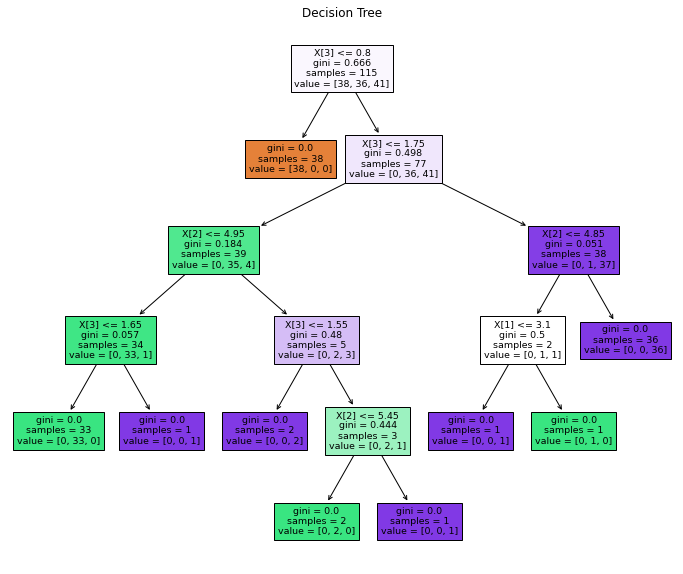

In [20]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(DTree, filled = True)
plt.title("Decision Tree")